# Big Data for Biologists: Decoding Genomic Function- Class 8

## How do you visualize similarities and differences of gene expression profiles across cell types? Part II

##  Learning Objectives
***Students should be able to***
 <ol>
 <li> <a href=#MetaData>Prepare RNA-Seq samples and metadata for PCA analysis</a></li> 
 <li> <a href=#PCA1>Describe what Principal Component analysis is and how it can be used to analyze and visualize variation in large datasets</a></li>
 <li> <a href=#PCA2>Perform prinicipal component analysis to identify clustering patterns in gene expression data </a></li>
 <li> <a href=#Scatter>Make a scatter plot of the output from principal component analysis</a></li> 

# Prepare RNA-Seq samples and metadata for PCA analysis (review)<a name='MetaData' />

In [8]:
%load_ext autoreload
# load the pandas package and define an abbreviation (or alias) 
import pandas as pd   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will focus our analysis on 4 of the anatomical structures and check for differential gene expression among them.  


In [9]:
metadata_filename='/data/datasets/RNAseq/rnaseq_metadata.txt'
rnaseq_filename='/data/datasets/RNAseq/rnaseq_normalized.tsv'

## BEGIN SOLUTION ## 
#Read in the metadata table. 
metadata = pd.read_table(filepath_or_buffer=metadata_filename, 
     header=0,
    index_col=0)
# Read in the RNA-seq data matrix. 
rnaseq_data= pd.read_table(filepath_or_buffer=rnaseq_filename, 
     header=0,
     index_col=0)
## END SOLUTION ##  



In [10]:
#Get the number of rows and columns in the rnaseq_data table 
## BEGIN SOLUTION ## 
num_rows=rnaseq_data.shape[0]
num_cols=rnaseq_data.shape[1]
## END SOLUTION ## 
print("Number rows: "+str(num_rows))#prints number of rows -- this is the sample
print("Number columns: "+str(num_cols))#prints number of columns -- this is the gene axis

Number rows: 55667
Number columns: 410


In [11]:
#Transpose the data frame 
#Now, our features (genes) are along the column axis, and sample names are along the row axis. This will make for easier
#downstream analysis. 

## BEGIN SOLUTION##
rnaseq_data_subset_transposed=rnaseq_data.transpose()
## END SOLUTION ## 
print("Number rows: "+str(rnaseq_data_subset_transposed.shape[0]))#prints number of rows -- this is the gene axis 
print("Number columns: "+str(rnaseq_data_subset_transposed.shape[1]))#prints number of columns

Number rows: 410
Number columns: 55667


In [12]:
#merge the rnaseq_subset dataframe with the metadata frame so we can more easily sub-select the organ systems 
#of interst.

## BEGIN SOLUTION 
## Hint: Use the "merge" function from pandas 
merged_df=pd.merge(rnaseq_data_subset_transposed, metadata, left_index=True, right_index=True)
## END SOLUTION 
display(merged_df.head())
display(merged_df.shape)

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,0.675065,3.176028,-0.100813,3.750078,-0.005248,-0.008347,1.895792,0.071096,1.717195,0.086997,...,3.007283,0.106460,0.143332,0.102862,3.135837,1.171673,-0.011186,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,0.277090,2.113871,0.325754,1.852882,0.007042,0.022288,0.654517,0.013041,1.777113,0.168219,...,2.534540,0.102920,0.029297,0.089795,3.293024,0.909186,0.017020,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.187297,2.990098,0.068335,3.030287,0.002427,0.012498,1.072950,0.041683,1.904739,0.139392,...,3.166439,0.099807,0.040695,0.081328,3.832852,0.175359,-0.000313,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,-0.104115,2.860598,-0.067226,2.432092,-0.028182,0.015227,0.631293,-0.242030,2.311262,0.133319,...,2.714726,0.046975,-0.183519,0.162563,3.613722,0.783756,0.003784,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.384825,3.392432,0.145993,2.051930,-0.000008,0.009046,0.286721,0.084697,2.446061,0.137258,...,2.837897,0.012638,0.069255,0.089867,4.446532,1.255056,0.009028,Blood,Blood,Leukemia


(410, 55670)

In [13]:
#Define the systems of interest
systems_subset=["Blood","Embryonic","Immune","Respiratory"]

In [14]:
#Pick out the samples (rows) in the merged dataframe that contain the samples from the systems of interest 
##BEGIN SOLUTION 
samples_to_keep=merged_df['System'].isin(systems_subset)
samples_to_keep.head()
## END SOLUTION 

ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello    False
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                                              False
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson                  True
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                                             False
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                                        True
Name: System, dtype: bool

In [15]:
#Select the rows in the data matrix that contain the samples we wish to analyze (i.e. the samples
#from blood, embryonic, immune, and)

## BEGIN SOLUTION 
merged_df_subset=merged_df[samples_to_keep]
## END SOLUTION 

In [16]:
display(merged_df_subset.head())
display(merged_df_subset.shape)

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.187297,2.990098,0.068335,3.030287,0.002427,0.012498,1.072950,0.041683,1.904739,0.139392,...,3.166439,0.099807,0.040695,0.081328,3.832852,0.175359,-0.000313,Embryonic,Trophoblast,ES.derived
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.384825,3.392432,0.145993,2.051930,-0.000008,0.009046,0.286721,0.084697,2.446061,0.137258,...,2.837897,0.012638,0.069255,0.089867,4.446532,1.255056,0.009028,Blood,Blood,Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,0.805894,2.345439,0.033347,2.783840,0.004928,0.014051,-0.213324,0.093003,2.479022,0.062528,...,1.990848,0.062083,0.084751,0.101481,3.415822,2.394278,0.008071,Blood,Blood,Lymphoblastoid
ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,0.312230,3.183208,0.153861,2.028751,0.002950,0.002064,0.783033,0.066531,3.088628,-0.031498,...,1.629999,0.081016,0.085211,0.120326,5.430897,1.120048,0.001673,Blood,Blood,HSC
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Primary_Cells.CSHL_Gingeras,0.160138,2.133929,0.077260,2.683576,0.003354,0.005010,0.668882,0.073288,2.662957,-0.073561,...,2.899638,0.038162,0.069725,0.142189,3.799500,0.782373,-0.013330,Respiratory,Lung,Smooth


(116, 55670)

In [17]:
#Check row & column numbers in merged_df_subset 
print("Number rows: "+str(merged_df_subset.shape[0]))#prints number of rows -- this is the sample axis
print("Number columns: "+str(merged_df_subset.shape[1]))# prints the number of columns -- this is the gene axis 

Number rows: 116
Number columns: 55670


In [18]:
#We want to exclude the genes that have expression <= 0 in all 4 organ systems of interest
nonzero_columns=merged_df_subset.iloc[:,0:-3].sum(axis=0)>0
nonzero_columns['System']=True
nonzero_columns['Organ']=True
nonzero_columns['CellType']=True


Note that `merged_df_subset.iloc[:,0:-3].sum(axis=0)>0` returns a value of "True" or "False" at each gene column in the`merged_df_subset` matrix. This is referred to as binary indexing. We also indicate that we want the metadata columns (System, Organ, CellType) to be set to True (i.e. included in the matrix). 

Next, we identify the columns with a value of "True", and select them from `merged_df_subset`. 
This can be done with the command: 

In [19]:
merged_df_subset_nonzero=merged_df_subset.iloc[:,nonzero_columns.tolist()]
print(merged_df_subset_nonzero.shape)

(116, 54129)


We have extracted RNA-seq expression data for our four organ systems of interest. We have also removed all genes that are not expressed in any of the four organ systems.

## What is principal component analysis (PCA)? <a name='PCA1' />

Principal component analysis (PCA) is a statistical method to understand and visualize variation in large datasets.

In [20]:
from IPython.display import HTML
HTML('<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vRcZ3RiXYbwH_xrE-261ccJT71HKZ5oPJqmIATdHa2SwvDekvAR5Lr7zDwnNPN88FAEM2XT-F6-DHiS/embed?start=false&loop=false&delayms=60000" frameborder="0" width="960" height="749" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>')

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


We will use the [scikit learn](http://scikit-learn.org/stable/) python library to perform principal component analysis. We import scikit learn with the command "import sklearn". This library has a number of built-in tools for performing statistical analysis and machine learning. 

[This tutorial](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) provides a guide to performing PCA analysis with scikit learn.

Thought questions: 

* What do principal components represent?
* Which genes will have the greatest influence on the principal components?
* Which samples / cells will cluster together in the PCA plot?

In [21]:
# Perform principal component analysis on the data to check for clustering patterns
from sklearn.decomposition import PCA as sklearnPCA

#We decompose the data into 10 principal components 
sklearn_pca = sklearnPCA(n_components=10)
#We want to exclude the metadata columns from the PCA transformation -- they have served their purpose in helping 
#us filter the dataset to the organ systems of interest, and now we remove them. 
metadata_subset=merged_df_subset_nonzero[['System','Organ','CellType']]
merged_df_subset_nometadata = merged_df_subset_nonzero.drop(metadata_subset, axis=1)

pca_results = sklearn_pca.fit_transform(merged_df_subset_nometadata)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.

In [22]:
display(merged_df_subset_nonzero.shape)
display(merged_df_subset_nometadata.shape)
display(metadata_subset.shape)

(116, 54129)

(116, 54126)

(116, 3)

We visualize the percent of variance explained by each principal component in a graph called a "scree plot"

In [23]:
#We use our plotly helper functions to generate a scree plot from the principal component analysis. 
#Import the plotting helper functions from the helpers directory
from plotnine import * 

In [24]:
print(sklearn_pca.explained_variance_ratio_)

[0.33231557 0.08881498 0.05109061 0.03663335 0.03005643 0.0249318
 0.02244723 0.01961046 0.01735401 0.01457804]


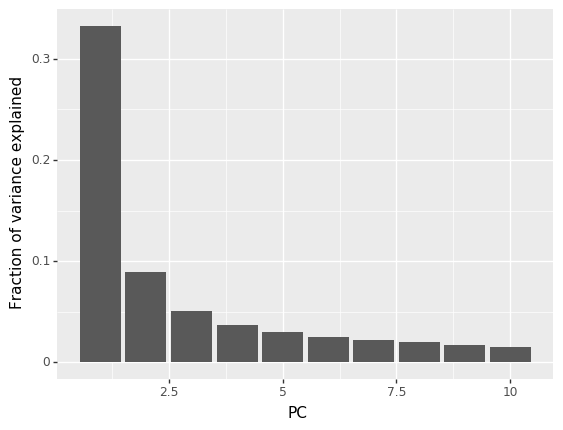

<ggplot: (8755534464425)>

In [25]:
#We use the plotnine plotting library to generate a scree plot of the variance explained by each component
#Now, we create a barplot with just our 4 organ systems of interest 
y=sklearn_pca.explained_variance_ratio_
x=range(1,len(y)+1)
qplot(x=x,
      y=y,
      geom="bar",
      stat="identity",
      xlab="PC",
      ylab="Fraction of variance explained")

This indicates that the first principal component explain 33% of the variance in the data, while the second principal component explains 9% of the variance. 

Scree plots can be visualized as  both bar graphs and line plots. Below, we write the code to visualize the scree plot as a line graph. 


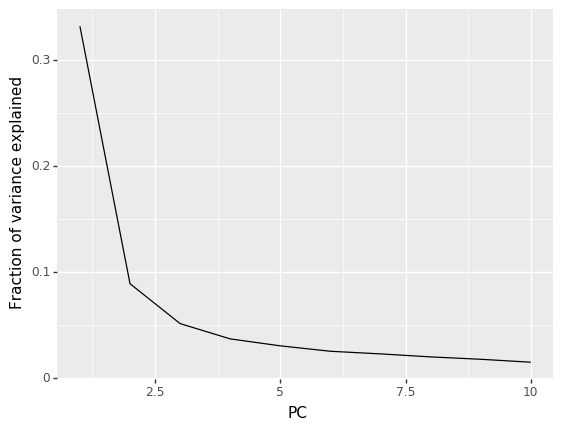

<ggplot: (8755556035869)>

In [26]:
qplot(x=x,
      y=y,
      geom="line",
      xlab="PC",
      ylab="Fraction of variance explained")

In [27]:
pca_results[0:10]

array([[ 76.84407508,  24.61833062,  10.4589849 ,  15.83878947,
         91.67962879,   6.29051208, -24.29533672,   4.75558387,
          9.86575633,  -8.01137343],
       [-46.69300968,   7.70111598,  -6.71952739,   2.94667187,
         -0.12260887,  -5.34303922,  -2.36355066,  -9.03855371,
          7.00914518,   8.51248068],
       [-76.87234167,   7.14991845,  -9.78262749, -22.26466561,
          1.38703566,  34.34603217, -28.16569323,  -2.2540421 ,
        -35.04136367,   1.1966794 ],
       [ -0.67120286,  -3.72398942, -16.46361639,   0.7757885 ,
          3.54699554, -22.1158911 ,   9.6216931 ,  -1.54798241,
          2.70523816,  14.45353589],
       [ 45.20305805, -45.59842908,  -7.09032635,  -4.6651932 ,
         -5.80589413,   5.98768345, -11.78769496,  -1.50449113,
         18.60915248,  10.62318036],
       [-48.34554828,  12.09132183, -12.37899633,  -1.66178674,
          4.12649867,   1.64561297,  -6.56235662,  -7.81345264,
          5.98399502,  -0.86025891],
       [ -

In [28]:
print(pca_results.shape)

(116, 10)


In [29]:
print (type(pca_results))

<class 'numpy.ndarray'>


## Make a scatter plot of the output from principal component analysis <a name='Scatter' />

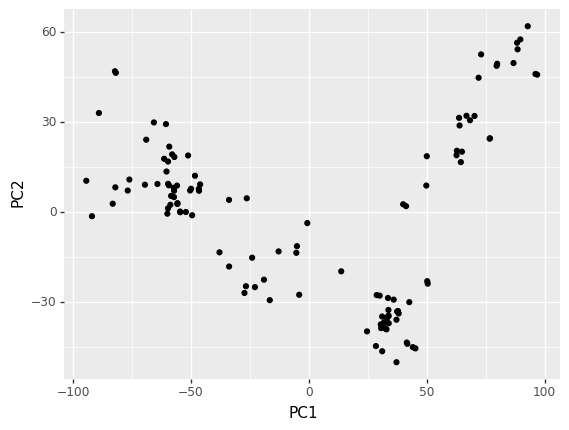

<ggplot: (8755534355221)>

In [30]:
#We make a scatterplot of PC1 vs PC2 
x=pca_results[:,0]
y=pca_results[:,1]
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC2")

To investigate whether there is any clustering of samples by organ system, we can color-code by the 'System' column from the metadata table.

We use the "scale_color_discrete" function to assign discrete color names (selected from a pre-defined color palette) to each System. 


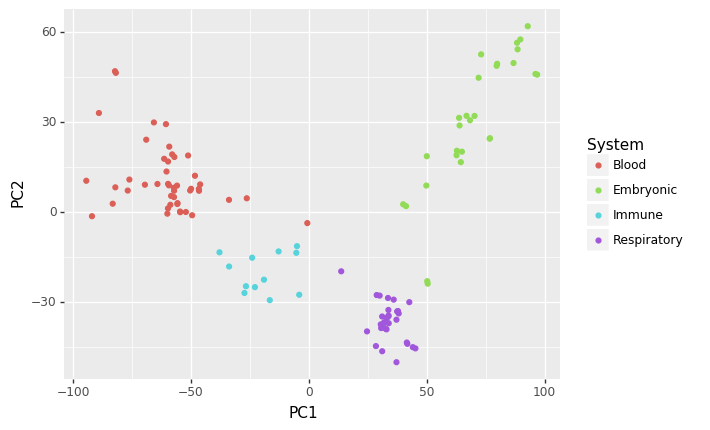

<ggplot: (8755534319777)>

In [31]:
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC2",
      color=list(metadata_subset['System']))+scale_color_discrete(name="System")

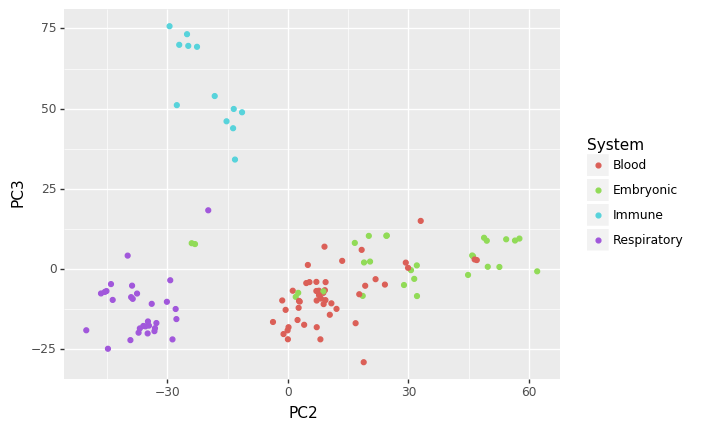

<ggplot: (8755534249329)>

In [32]:
#Make a scatter plot of principle component 2 (PC2) vs principle component 3 (PC3)
#Make sure to change your axes labels too!

##BEGIN SOLUTION## 
x=pca_results[:,1]
y=pca_results[:,2]
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC2",
      ylab="PC3",
      color=list(metadata_subset['System']))+scale_color_discrete(name="System")
##END SOLUTION ## 

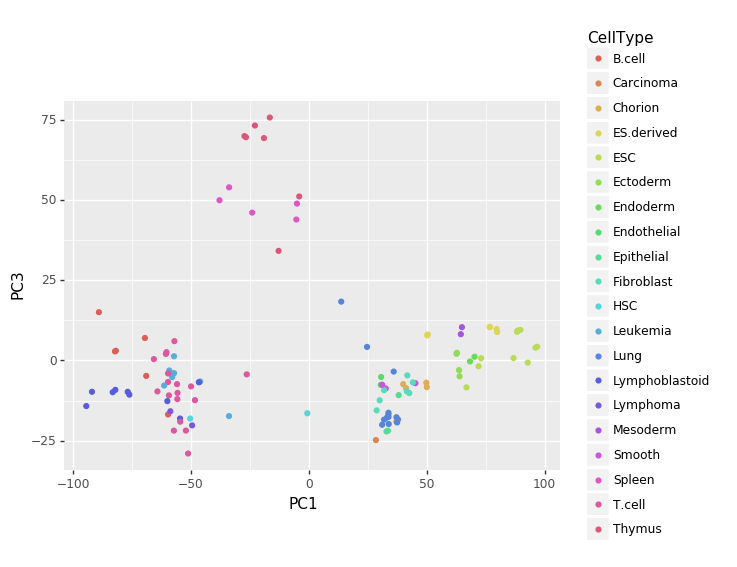

<ggplot: (8755534086853)>

In [35]:
#Make a scatter plot of principle component 1 (PC1) vs principle component 3 (PC3)
#Make sure to change your axes labeles too!

##BEGIN SOLUTION## 
x=pca_results[:,0]
y=pca_results[:,2]
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC3",
      color=list(metadata_subset['CellType']))+scale_color_discrete(name="CellType")

##END SOLUTION ## 